In [1]:
datalist = [{ "IP": [ { "IP": "211.57.88.250", "count": 8 }, { "IP": "218.28.1.61", "count": 16 }, { "IP": "61.199.220.226", "count": 16 } ], "URL": [ { "URL": "p15105218.pureserver.info", "count": 10 }, { "URL": "iis.willowtec.com", "count": 28 } ], "memory": [ { "Memory available": "125312k", "Memory total": "129720k", "apg memory": "93M", "count": 2 } ] },
            { "IP": [ { "IP": "211.57.88.250", "count": 8 }, { "IP": "218.28.1.61", "count": 16 }, { "IP": "61.199.220.226", "count": 16 } ], "URL": [ { "URL": "p15105218.pureserver.info", "count": 10 }, { "URL": "iis.willowtec.com", "count": 28 } ], "memory": [ { "Memory available": "125312k", "Memory total": "129720k", "apg memory": "93M", "count": 2 } ] },
             { "IP": [ { "IP": "211.57.88.250", "count": 8 }, { "IP": "218.28.1.61", "count": 16 }, { "IP": "61.199.220.226", "count": 16 } ], "URL": [ { "URL": "p15105218.pureserver.info", "count": 10 }, { "URL": "iis.willowtec.com", "count": 28 } ], "memory": [ { "Memory available": "125312k", "Memory total": "129720k", "apg memory": "93M", "count": 2 } ] }
            ]
merged_dict = {"IP": [], "URL": [], "memory": []}
ip_dict = {}
url_dict = {}

for data in datalist:
    # merge IP and URL
    for ip_entry in data.get("IP", []):
        if ip_entry["IP"] in ip_dict:                       
            ip_dict[ip_entry["IP"]] += ip_entry["count"]
        else:
            ip_dict[ip_entry["IP"]] = ip_entry["count"]
    for url_entry in data.get("URL", []):
        if url_entry["URL"] in url_dict:
            url_dict[url_entry["URL"]] += url_entry["count"]
        else:
            url_dict[url_entry["URL"]] = url_entry["count"]
    # merge memory
    
    # for memory_entry in data.get("memory", []):
        
        

print(ip_dict)
print(url_dict)


merged_dict["IP"] = [{"IP": ip, "count": count} for ip, count in ip_dict.items()]
merged_dict["URL"] = [{"URL": url, "count": count} for url, count in url_dict.items()]

print(merged_dict)

{'211.57.88.250': 24, '218.28.1.61': 48, '61.199.220.226': 48}
{'p15105218.pureserver.info': 30, 'iis.willowtec.com': 84}
{'IP': [{'IP': '211.57.88.250', 'count': 24}, {'IP': '218.28.1.61', 'count': 48}, {'IP': '61.199.220.226', 'count': 48}], 'URL': [{'URL': 'p15105218.pureserver.info', 'count': 30}, {'URL': 'iis.willowtec.com', 'count': 84}], 'memory': []}


# 去重


In [47]:
import json
with open("data/splited data/12-192x1024/result_human_Linux_1.json", "r") as f:
    data = json.load(f)

In [48]:
# 去重
def remove_repeat(data):
    data["IP"] = list(set(data["IP"]))
    data["URL"] = list(set(data["URL"]))
    return data

new_data = remove_repeat(data)

with open("data/splited data/12-192x1024/norepeat_result_human_Linux_1.json", 'w', encoding='utf-8') as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

print("新的JSON文件已生成。")

新的JSON文件已生成。


# 添加正则匹配次数

In [69]:
import json
import re 
with open("data/splited data/18-128x1024/result_huaman_Linux_17.json", "r") as f:
    data = json.load(f)

with open("data/splited data/18-128x1024/Linux_17.txt", "r",errors='ignore') as f:
    text = f.read()

In [70]:
def count_occurrences(items,text):
    result = {"IP":[],"URL":[],}
    for item in items["IP"]:
        count = len(re.findall(item,text))
        result["IP"].append({"IP":item,"count":count})
    for item in items["URL"]:
        count = len(re.findall(item,text))
        result["URL"].append({"URL":item,"count":count})
    return result

In [71]:
new_data = {
    "IP": count_occurrences(data, text)["IP"],
    "URL": count_occurrences(data, text)["URL"],
    "Memory": []
}

In [72]:
with open("data/splited data/18-128x1024/new_result_huaman_Linux_17.json", 'w', encoding='utf-8') as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

print("新的JSON文件已生成。")

新的JSON文件已生成。


# get bad case

In [16]:
def get_bad_case(result_predict, result_standard):
    """get miss extracted IPs and URL for predict result from standard result"""
    miss_ip = set(result_predict["IP"].keys()) - set(result_standard["IP"].keys())
    miss_url = set(result_predict["URL"].keys()) - set(result_standard["URL"].keys())
    return {"IP": list(miss_ip), "URL": list(miss_url)}


def get_miss_ccase(result_predict, result_standard):
    '''get bad cased extracted from IPs and URLs for predict result from standard result'''
    bad_ip = set(result_predict["IP"].keys()) - set(result_standard["IP"].keys())
    bad_url = set(result_predict["URL"].keys()) - set(result_standard["URL"].keys())
    return {"IP": list(bad_ip), "URL": list(bad_url)}

def load_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data

In [ ]:
llm_result = load_json("result/result_2024-09-03_14-46-46_counts/inference_output/output0.json")
human_result = load_json("data/splited data/12-192x1024/new_result_human_Linux_1.json")

In [9]:
from utils.utiles import merge_json_files
merge_json_files("result/result_2024-09-11_15-37-44_128k_all_file_infer and eval/inference_output","result/result_2024-09-11_15-37-44_128k_all_file_infer and eval/inference_output/merged.json")

In [2]:
import re
llm_url_list = ["62.99.164.82.sh.interxion.inode.at"]
ip_in_url = []
ip_pattern = r'^\b(?:\d{1,3}\.){3}\d{1,3}\b$'
for i in llm_url_list:
    if re.match(ip_pattern, i):
        ip_in_url.append(i)
print(ip_in_url)

[]


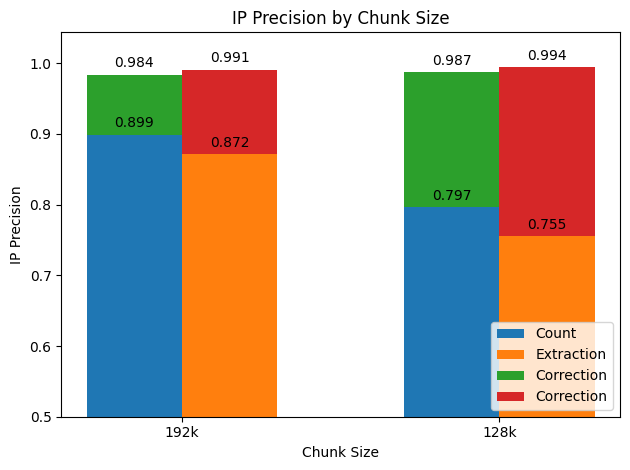

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# IP precision
# x: chunk size
labels = ["192k","128k"]

count = [0.899,0.797]
correct_count = [0.984-0.899, 0.987-0.797]
extraction = [0.872,0.755]
correct_extraction = [0.991-0.872,0.994-0.755]

x = np.arange(len(labels)) # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()


rects1 = ax.bar(x - width/2, count, width, label='Count')
rects2 = ax.bar(x + width/2, extraction, width, label='Extraction')
rects3 = ax.bar(x - width/2, correct_count,width,bottom=count, label='Correction')
rects4 = ax.bar(x + width/2, correct_extraction,width,bottom=extraction, label='Correction')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IP Precision')
ax.set_xlabel('Chunk Size')
ax.set_title('IP Precision by Chunk Size')
ax.set_xticks(x,labels)
ax.legend(loc = "lower right")



ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
plt.ylim(ymin=0.5)
plt.show()

In [ ]:
from anthropic import AnthropicVertex

LOCATION="europe-west1" # or "us-east5"
project_id="log-analysis-433902"

client = AnthropicVertex(region=LOCATION, project_id="log-analysis-433902")

message = client.messages.create(
  max_tokens=1024,
  messages=[
    {
      "role": "user",
      "content": "Send me a recipe for banana bread.",
    }
  ],
  model="claude-3-5-sonnet@20240620",
)
print(message.model_dump_json(indent=2))